# <p style="background-color:lime; font-family:calibri; color:maroon; font-size:150%; text-align:center; border-radius:15px 50px;">1. Business Understanding</p>

##### Aktivitas merokok merupakan salah satu penyebab sumber penyakit, tidak hanya berdampak pada perokok aktif saja, namun orang-orang di sekitar perokok atau perokok pasif juga terkena dampaknya. Perokok pasif lebih mungkin untuk mengalami dampak penyakit seperti perokok aktif.Namun, jika 1% dari populasi manusia yang ada menjadi perokok pasif maka jumlah dokter spesialis paru yang ada tidak akan mampu menanganinya. Ini adalah masalah yang harus diatasi. Pengguna dapat melakukan diagnosa awal terhadap gejala yang diderita serta penanganannya. Perhitungan dilakukan berdasarkan nilai keyakinan seorang pakar terhadap gejala-gejala suatu penyakit. Sistem pakar yang dihasilkan diberi nama Diagperosif dimana sistem mendiagnosa penyakit berdasarkan gejala-gejala yang dimasukkan oleh pengguna. Penyakit yang dapat didiagnosa oleh Diagperosif adalah asma, bronkitis, polisi, dan kanker paru-paru.

# <p style="background-color:lime; font-family:calibri; color:maroon; font-size:150%; text-align:center; border-radius:15px 50px;">2. Data Understanding</p>

In [1]:
# Import library untuk manipulasi data
import pandas as pd  # Untuk pengolahan data tabular
import numpy as np   # Untuk komputasi numerik
import matplotlib.pyplot as plt  # Untuk visualisasi data
import seaborn as sns  # Untuk visualisasi data statistik
from skimpy import skim # Import library skimpy untuk mendapatkan ringkasan statistik data yang lebih detail dan mudah dibaca
from summarytools import dfSummary # Import library summarytools untuk membuat ringkasan data yang komprehensif termasuk statistik, distribusi, dan missing values

# Import library untuk preprocessing data
from sklearn.model_selection import train_test_split  # Untuk membagi data train dan test
from sklearn.preprocessing import LabelEncoder  # Untuk encoding label kategorikal
from imblearn.over_sampling import SMOTE  # Untuk menangani data tidak seimbang

# Import library untuk model machine learning
from sklearn.tree import DecisionTreeClassifier  # Model pohon keputusan
from sklearn.ensemble import RandomForestClassifier  # Model random forest
from sklearn.naive_bayes import GaussianNB  # Model naive bayes
from sklearn.svm import SVC  # Model support vector machine
from sklearn.neighbors import KNeighborsClassifier  # Model k-nearest neighbors

# Import library untuk evaluasi model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Metrik evaluasi
from sklearn.metrics import roc_curve, auc  # Untuk kurva ROC dan nilai AUC

# Mengatur matplotlib untuk menampilkan plot di notebook
%matplotlib inline

In [2]:
# Memuat dataset
df = pd.read_csv('Penyakit Paru.csv')  

In [ ]:
#!pip install Jinja2

  Obtaining dependency information for Jinja2 from https://files.pythonhosted.org/packages/bd/0f/2ba5fbcd631e3e88689309dbe978c5769e883e4b84ebfe7da30b43275c5a/jinja2-3.1.5-py3-none-any.whl.metadata
  Obtaining dependency information for MarkupSafe>=2.0 from https://files.pythonhosted.org/packages/c1/80/a61f99dc3a936413c3ee4e1eecac96c0da5ed07ad56fd975f1a9da5bc630/MarkupSafe-3.0.2-cp312-cp312-win_amd64.whl.metadata
   ---------------------------------------- 0.0/134.6 kB ? eta -:--:--
   --- ------------------------------------ 10.2/134.6 kB ? eta -:--:--
   --- ------------------------------------ 10.2/134.6 kB ? eta -:--:--
   -------- ------------------------------ 30.7/134.6 kB 262.6 kB/s eta 0:00:01
   -------------------- ------------------ 71.7/134.6 kB 435.7 kB/s eta 0:00:01
   -------------------------------------  133.1/134.6 kB 561.1 kB/s eta 0:00:01
   -------------------------------------- 134.6/134.6 kB 529.2 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,No[int64],Mean (sd) : 15000.5 (8660.4)min < med < max:1.0 < 15000.5 < 30000.0IQR (CV) : 14999.5 (1.7),"30,000 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAb5JREFUeJzt101qwlAUQOH3ghVbRRFRF9AdOHQRXWwX4QocdNKRM0FCgqmlxabEuWgSsT1wvnGu9w6Of7EsyyD9d8lfHyBdo3PpgRjjYwihG5q/EX4azradp+6m3t12/qssy0OjUKtIJ5PJy3A4HNfdejweH4qieB4MBu9Jknzfc566m3r3LebzPE9jjK/nYr30idqtIl0ul4fRaPRZZ/Fmsxmv1+vpYrF4m8/naa2rW85Td1PvbjufZVlvtVqNd7td9c3dKNSTKtLZbPZRZ3maptVPhtDv92vPtp2n7qbefYv5EMJp/hz/TAnBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqhM41D2VZ1qv7wvv9/jRTFEVvu90+3XOeupt6d2g5f01fv5KWOeZTqJ76AAAAAElFTkSuQmCC"">",0(0.0%)
2,Usia[object],1. Muda2. Tua,"15,383 (51.3%)14,617 (48.7%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAATpJREFUeJzt2z1qw0AURtFRECFpJIzBi/EistgsQrsRwS7ikEZhynQaCT5jc07hykLDcJF/mNcty1IgoSulvJdSXiN3ez6/y7Lc7r2IR9Efj8ePYRgO917II7per19d130Kbp2+hnY+n2/jOP6svIZSyuVyeZum6TDPc/1UENsKfX2poZ1Op+81F/BP/QrCSi9r3wh7iY0YsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiBEb2fNs9SBg7pbPwZ616+vR5nri1EHAdnXv6hzCvdfxKAy87GPgpUFnlI8UT7Z2nmYbGeVrZHxvO6N8DYzv7WOUr51f7Rv5U5cYsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMWIjxihfA/u0j1G+Rsb3tjPw0s7AS9nmDwpbat+pwYsUAAAAAElFTkSuQmCC"">",0(0.0%)
3,Jenis_Kelamin[object],1. Wanita2. Pria,"22,225 (74.1%)7,775 (25.9%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAATVJREFUeJzt20GKwkAURdFfEkQnCRLIYrIIF+sispsgyUDFSclfgaLk5ae8Z9BTC3Jb7aZeyjkboJDM7Ghme8mrYWnPnPPdgqratj3XdX1a+yD43TzP15TSJWpwlYfW9/29aZrH2ofB96ZpOgzDcBrH0T+lYsbmPzy0rutuax8GP/OvRGHt1j4A/gexQYbYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA3a+2x+8U73kljCFp5h5VeJ/YZn9It3eM+fpe8QLCgGL2V5Rt0fuMSUDypbeGcL/duKgqZ80edpKGTKt4V5Gsqa8vFXciH4py5kiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENskAk95Yt6LhQ65Ys+T8PnGLzAVF4KW2rfXeWDJgAAAABJRU5ErkJggg=="">",0(0.0%)
4,Merokok[object],1. Aktif2. Pasif,"15,210 (50.7%)14,790 (49.3%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAATpJREFUeJzt2z1qw0AURtFRECFpJIzBi/EistgsQrsRwS7ikEZhynQaCT5jc07hykLDcJF/mNcty1IgoSulvJdSXiN3ez6/y7Lc7r2IR9Efj8ePYRgO917II7per19d130Kbp2+hnY+n2/jOP6svIZSyuVyeZum6TDPc/1UENsKfX2poZ1Op+81F/BP/QrCSi9r3wh7iY0YsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiBEb2fNs9SBg7pbPwZ616+vR5nri1EHAdnXv6hzCvdfxKAy87GPgpUFnlI8UT7Z2nmYbGeVrZHxvO6N8DYzv7WOUr51f7Rv5U5cYsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMWIjxihfA/u0j1G+Rsb3tjPw0s7AS9nmDwpbat+pwYsUAAAAAElFTkSuQmCC"">",0(0.0%)
5,Bekerja[object],1. Ya2. Tidak,"18,964 (63.2%)11,036 (36.8%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAATdJREFUeJzt2zFqw0AQheHZIELcSBiBDqND5LA5hG4jjLaIg5sN06ZI+aSd+b/CrWTzI2Ozr7TWDFAoZnYzs3fJ1fCfV2vtaYEN8zx/juN4P/tGsqu1PkopX5GDGzy0dV2f0zT9nH0zWR3H8bFt233fd/+GiRubv3hoy7J8n30zyd0suLezbwB5EBtkiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYoD3P5of3dJfEX1k+/8GPI/sp0QyH966s1vrwHYIFxuDlOl6R9weuMOWDSpYnW/inRg9STPkyzOR6EH7Kl2Um14MsUz5+aV8Af+pChtggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBpnwU77I7603KaZ8GWZyPWDwAlP5BQpbat9wwIrKAAAAAElFTkSuQmCC"">",0(0.0%)
6,Rumah_Tangga[object],1. Ya2. Tidak,"15,425 (51.4%

In [4]:
# Menampilkan semua baris
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 30000  │ │ string      │ 10    │                                                          │
│ │ Number of columns │ 11     │ │ int64       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column     ┃ NA   ┃ NA %    ┃ mean     ┃ sd      ┃ p0   ┃ p25    ┃ p50      ┃ p75     ┃ p100    ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ No         │    0 │       0 │    15000 │    8660 │    1 │   7501 │    15000 │   22500 │   30000 │  ▇▇▇▇▇▇  │  │
│ └────────────┴──────┴─────────┴──────────┴─────────┴──────┴────────┴──────────┴─────────┴─────────┴──────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓  │
│ ┃              ┃    ┃      ┃          ┃         ┃        ┃        ┃ chars per   ┃ words per    ┃             ┃  │
│ ┃ column       ┃ NA ┃ NA % ┃ shortest ┃ longest ┃ min    ┃ max    ┃ row         ┃ row          ┃ total words ┃  │
│ ┡━━━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩  │
│ │ Usia         │  0 │    0 │ Tua      │ Muda    │ Muda   │ Tua    │        3.51 │            1 │       30000 │  │
│ │ Jenis_Kelami │  0 │    0 │ Pria     │ Wanita  │ Pria   │ Wanita │        5.48 │            1 │       30000 │  │
│ │ n            │    │      │          │         │        │        │             │              │             │  │
│ │ Merokok      │  0 │    0 │ Pasif    │ Pasif   │ Aktif  │ Pasif  │           5 │            1 │       30000 │  │
│ │ Bekerja      │  0 │    0 │ Ya       │ Tidak   │ Tidak  │ Ya     │         3.1 │            1 │       30000 │  │
│ │ Rumah_Tangga │  0 │    0 │ Ya       │ Tidak   │ Tidak  │ Ya     │        3.46 │            1 │       30000 │  │
│ │ Aktivitas_Be │  0 │    0 │ Ya       │ Tidak   │ Tidak  │ Ya     │        3.25 │            1 │       30000 │  │
│ │ gadang       │    │      │          │         │        │        │             │              │             │  │
│ │ Aktivitas_Ol │  0 │    0 │ Sering   │ Sering  │ Jarang │ Sering │           6 │            1 │       30000 │  │
│ │ ahraga       │    │      │          │         │        │        │             │              │             │  │
│ │ Asuransi     │  0 │    0 │ Ada      │ Tidak   │ Ada    │ Tidak  │        3.58 │            1 │       30000 │  │
│ │ Penyakit_Baw │  0 │    0 │ Ada      │ Tidak   │ Ada    │ Tidak  │        3.71 │            1 │       30000 │  │
│ │ aan          │    │      │          │         │        │        │             │              │             │  │
│ │ Hasil        │  0 │    0 │ Ya       │ Tidak   │ Tidak  │ Ya     │        3.56 │            1 │       30000 │  │
│ └──────────────┴────┴──────┴──────────┴─────────┴────────┴────────┴─────────────┴──────────────┴─────────────┘  │
╰────────────────────────────────────────────────────── 

In [5]:
# Melihat dimensi data
print("Dimensi data:", df.shape)

Dimensi data: (30000, 11)


In [6]:
# Menampilkan beberapa baris pertama data
print("Baris pertama data:")
df.head()

Baris pertama data:


,No,Usia,Jenis_Kelamin,Merokok,Bekerja,Rumah_Tangga,Aktivitas_Begadang,Aktivitas_Olahraga,Asuransi,Penyakit_Bawaan,Hasil
0,1,Tua,Pria,Pasif,Tidak,Ya,Ya,Sering,Ada,Tidak,Ya
1,2,Tua,Pria,Aktif,Tidak,Ya,Ya,Jarang,Ada,Ada,Tidak
2,3,Muda,Pria,Aktif,Tidak,Ya,Ya,Jarang,Ada,Tidak,Tidak
3,4,Tua,Pria,Aktif,Ya,Tidak,Tidak,Jarang,Ada,Ada,Tidak
4,5,Muda,Wanita,Pasif,Ya,Tidak,Tidak,Sering,Tidak,Ada,Ya


In [7]:
# Menampilkan beberapa baris terakhir data
print("Baris terakhir data:")
df.tail()

Baris terakhir data:


,No,Usia,Jenis_Kelamin,Merokok,Bekerja,Rumah_Tangga,Aktivitas_Begadang,Aktivitas_Olahraga,Asuransi,Penyakit_Bawaan,Hasil
29995,29996,Muda,Pria,Aktif,Tidak,Ya,Ya,Jarang,Ada,Tidak,Tidak
29996,29997,Tua,Wanita,Aktif,Ya,Tidak,Ya,Jarang,Ada,Ada,Tidak
29997,29998,Tua,Wanita,Aktif,Ya,Tidak,Ya,Jarang,Ada,Ada,Tidak
29998,29999,Muda,Wanita,Pasif,Ya,Tidak,Tidak,Sering,Tidak,Ada,Tidak
29999,30000,Tua,Wanita,Pasif,Tidak,Ya,Tidak,Sering,Tidak,Tidak,Ya


In [8]:
# Mengecek tipe data dari setiap kolom
print("Tipe data setiap kolom:")
df.dtypes

Tipe data setiap kolom:


No                     int64
Usia                  object
Jenis_Kelamin         object
Merokok               object
Bekerja               object
Rumah_Tangga          object
Aktivitas_Begadang    object
Aktivitas_Olahraga    object
Asuransi              object
Penyakit_Bawaan       object
Hasil                 object
dtype: object

In [9]:
# Menghitung statistik deskriptif untuk kolom numerik
print("Statistik deskriptif untuk kolom numerik:")
df.describe()

Statistik deskriptif untuk kolom numerik:


,No
count,30000.000000
mean,15000.500000
std,8660.398374
min,1.000000
25%,7500.750000
50%,15000.500000
75%,22500.250000
max,30000.000000


# <p style="background-color:lime; font-family:calibri; color:maroon; font-size:150%; text-align:center; border-radius:15px 50px;">3. Data Preparation</p>

In [10]:
# Mengecek nilai yang hilang (missing values) di setiap kolom
print("Nilai yang hilang di setiap kolom:")
df.isnull().sum()

Nilai yang hilang di setiap kolom:


No                    0
Usia                  0
Jenis_Kelamin         0
Merokok               0
Bekerja               0
Rumah_Tangga          0
Aktivitas_Begadang    0
Aktivitas_Olahraga    0
Asuransi              0
Penyakit_Bawaan       0
Hasil                 0
dtype: int64

In [11]:
# # Langkah 1: Menangani Missing Values
# # Mengisi nilai yang hilang dengan mean untuk kolom numerik dan mode untuk kolom kategorikal
# for column in df.select_dtypes(include=[np.number]).columns:
#     df[column].fillna(df[column].mean(), inplace=True)

# for column in df.select_dtypes(include=[object]).columns:
#     df[column].fillna(df[column].mode()[0], inplace=True)

In [12]:
# Langkah 2: Feature Selection yaitu Menghapus kolom tertentu
columns_to_drop = ['No', 'Rumah_Tangga','Asuransi']
df = df.drop(columns=columns_to_drop)

In [14]:
df

,Usia,Jenis_Kelamin,Merokok,Bekerja,Aktivitas_Begadang,Aktivitas_Olahraga,Penyakit_Bawaan,Hasil
0,Tua,Pria,Pasif,Tidak,Ya,Sering,Tidak,Ya
1,Tua,Pria,Aktif,Tidak,Ya,Jarang,Ada,Tidak
2,Muda,Pria,Aktif,Tidak,Ya,Jarang,Tidak,Tidak
3,Tua,Pria,Aktif,Ya,Tidak,Jarang,Ada,Tidak
4,Muda,Wanita,Pasif,Ya,Tidak,Sering,Ada,Ya
...,...,...,...,...,...,...,...,...
29995,Muda,Pria,Aktif,Tidak,Ya,Jarang,Tidak,Tidak
29996,Tua,Wanita,Aktif,Ya,Ya,Jarang,Ada,Tidak
29997,Tua,Wanita,Aktif,Ya,Ya,Jarang,Ada,Tidak
29998,Muda,Wanita,Pasif,Ya,Tidak,Sering,Ada,Tidak


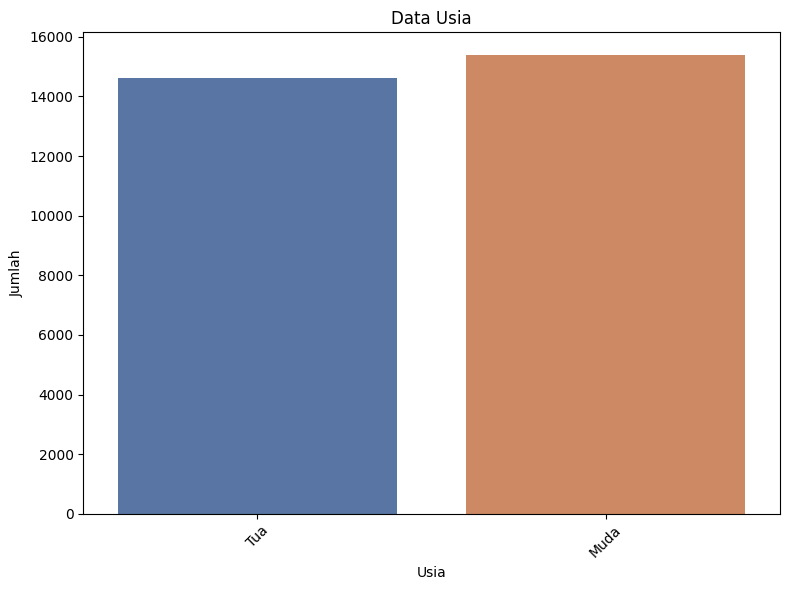

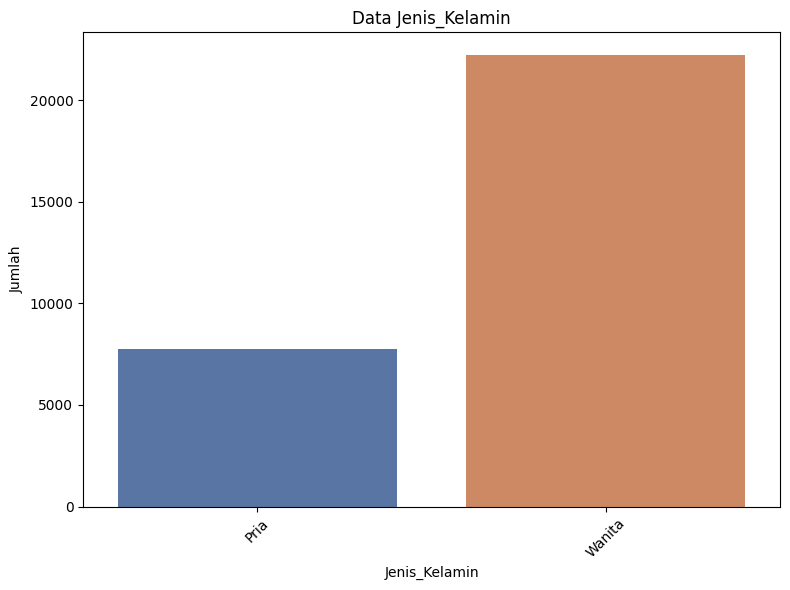

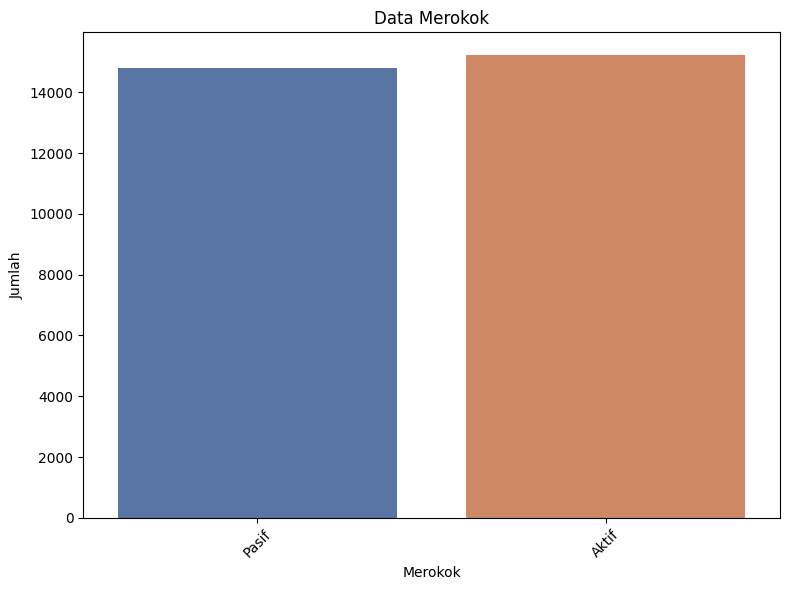

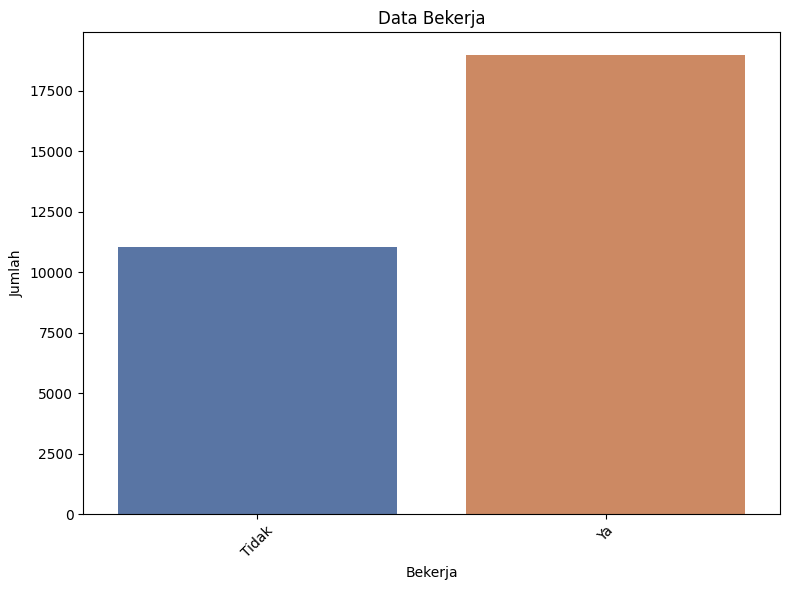

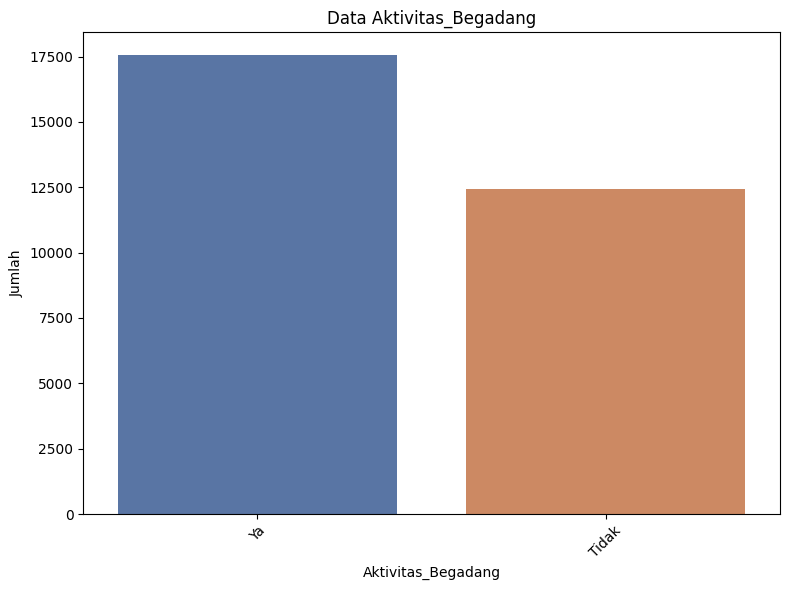

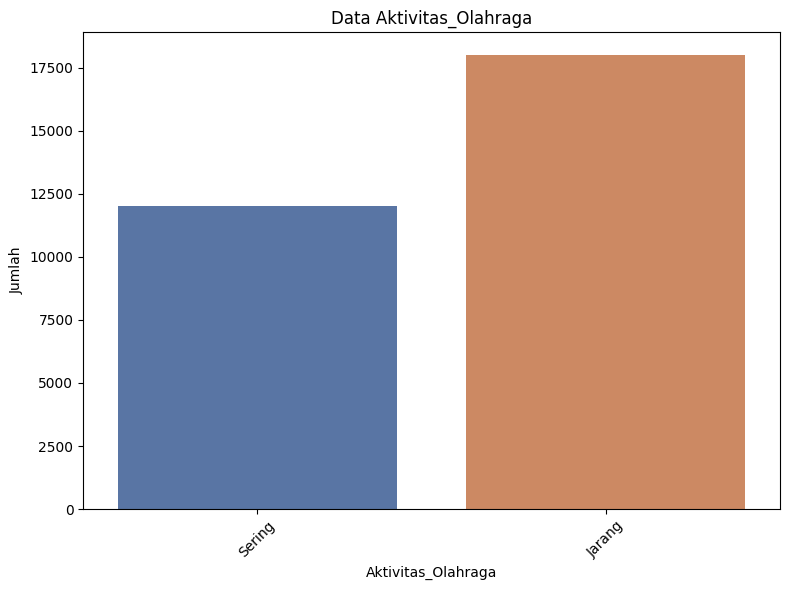

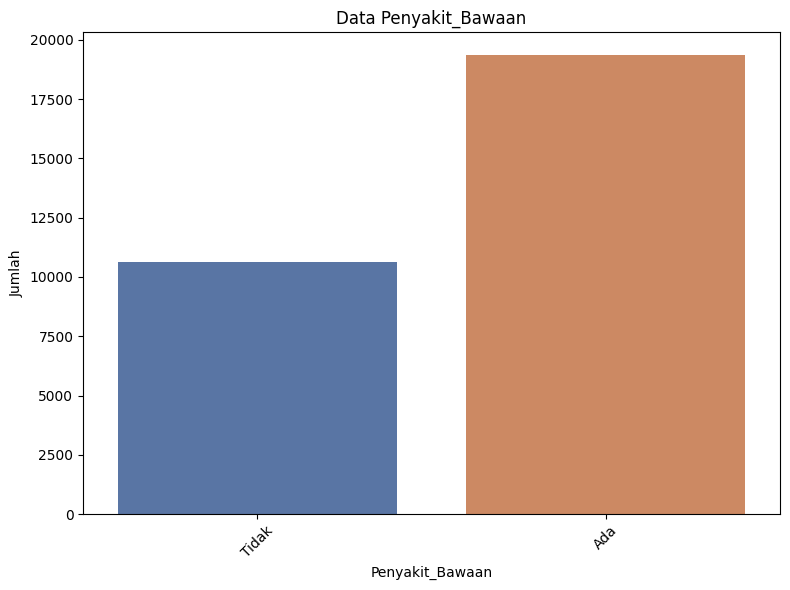

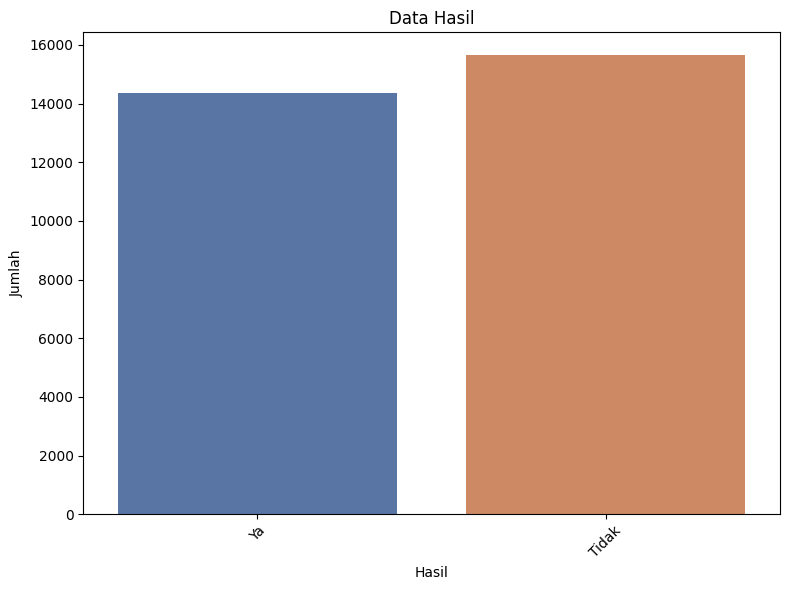

In [13]:
# Langkah 3: Data Visualization
# Membuat beberapa visualisasi dasar untuk memahami distribusi data

# Mendefinisikan fungsi plot_bar_chart yang menerima parameter data dan column
# Fungsi ini akan membuat visualisasi bar chart untuk setiap kolom
def plot_bar_chart(data, column):
    # Membuat figure baru dengan ukuran 8x6 inch
    plt.figure(figsize=(8, 6))
    
    # Membuat bar chart menggunakan seaborn countplot
    # x = nama kolom yang akan divisualisasikan
    # data = dataframe yang digunakan
    # hue = memberikan warna berbeda untuk setiap nilai unik pada kolom
    # palette = skema warna yang digunakan ("deep")
    # legend = False untuk menyembunyikan legend
    sns.countplot(x=column, data=data, hue=column, palette="deep", legend=False)
    
    # Menambahkan judul grafik
    plt.title(f'Data {column}')
    
    # Menambahkan label pada sumbu x dan y
    plt.xlabel(column)
    plt.ylabel('Jumlah')
    
    # Memutar label sumbu x 45 derajat agar lebih mudah dibaca
    plt.xticks(rotation=45)
    
    # Mengatur layout agar tidak tumpang tindih
    plt.tight_layout()
    
    # Menampilkan plot
    plt.show()

# Melakukan iterasi untuk setiap kolom dalam dataframe
# Dan membuat bar chart untuk masing-masing kolom menggunakan fungsi plot_bar_chart
for column in df.columns:
    plot_bar_chart(df, column)


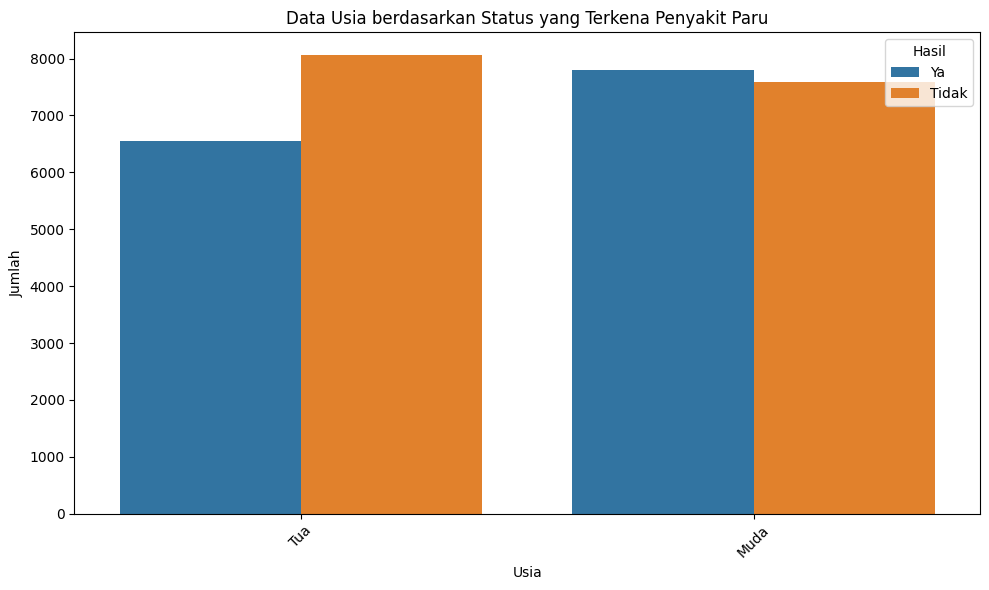

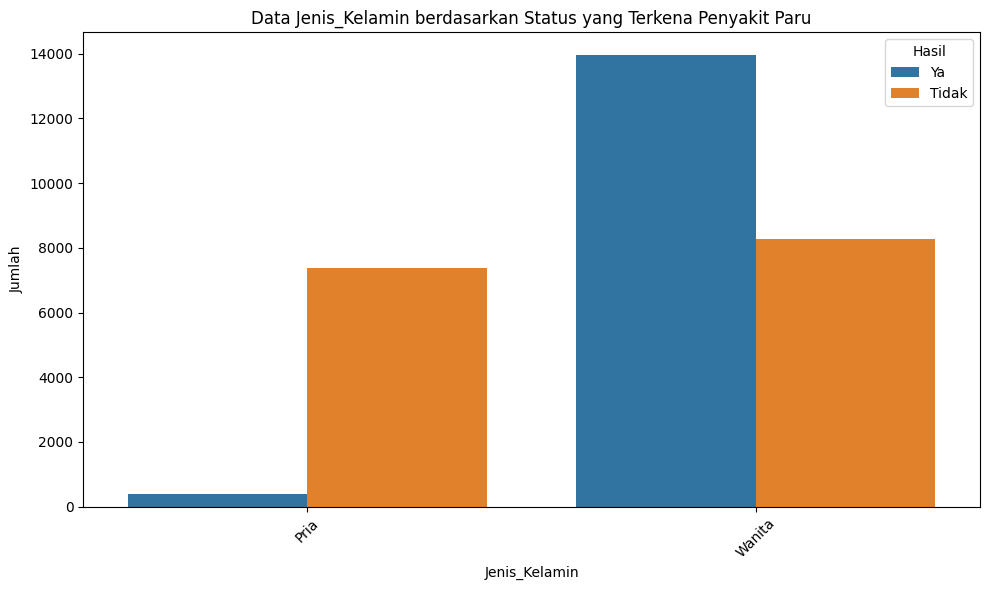

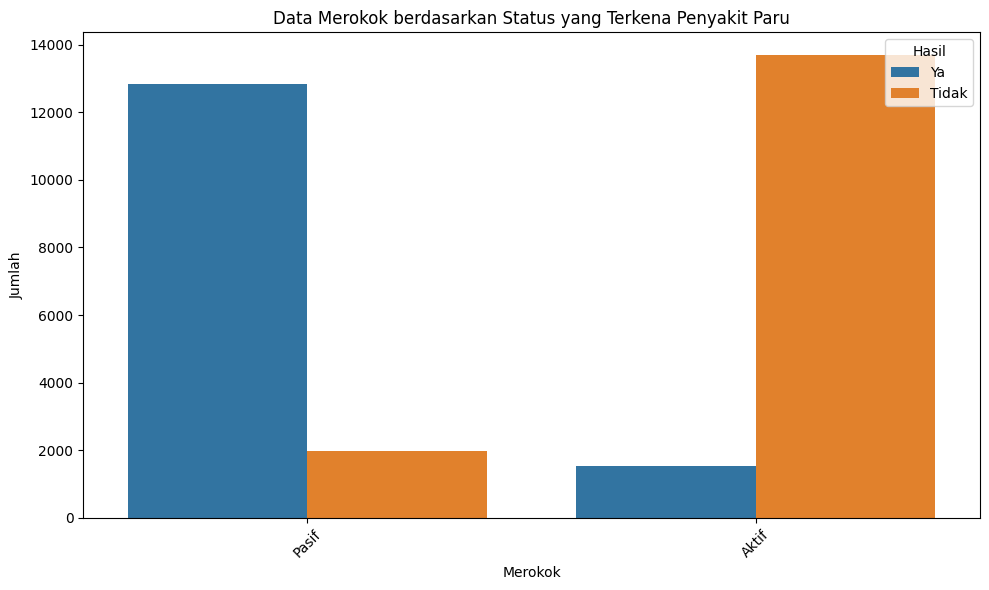

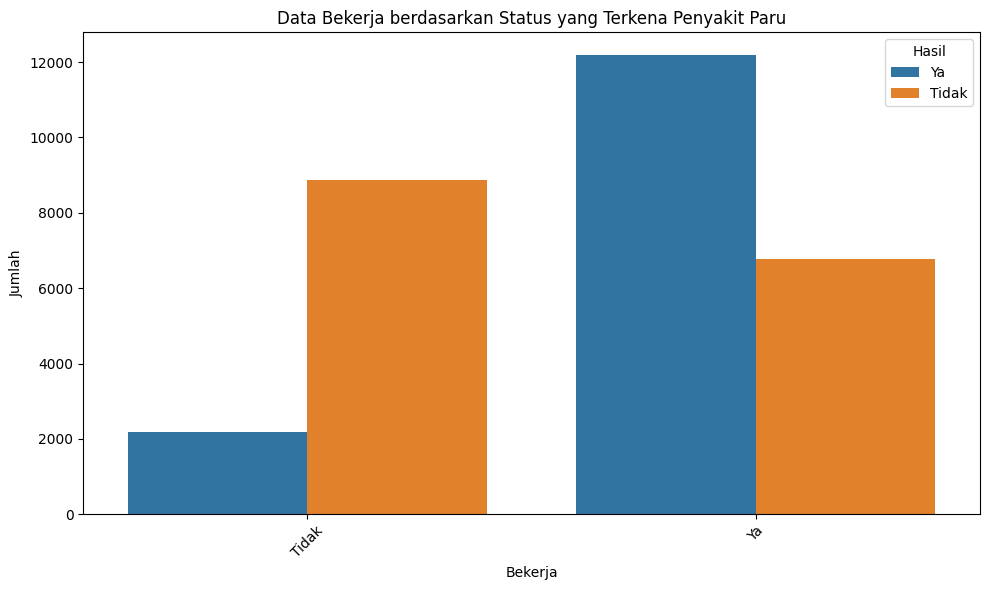

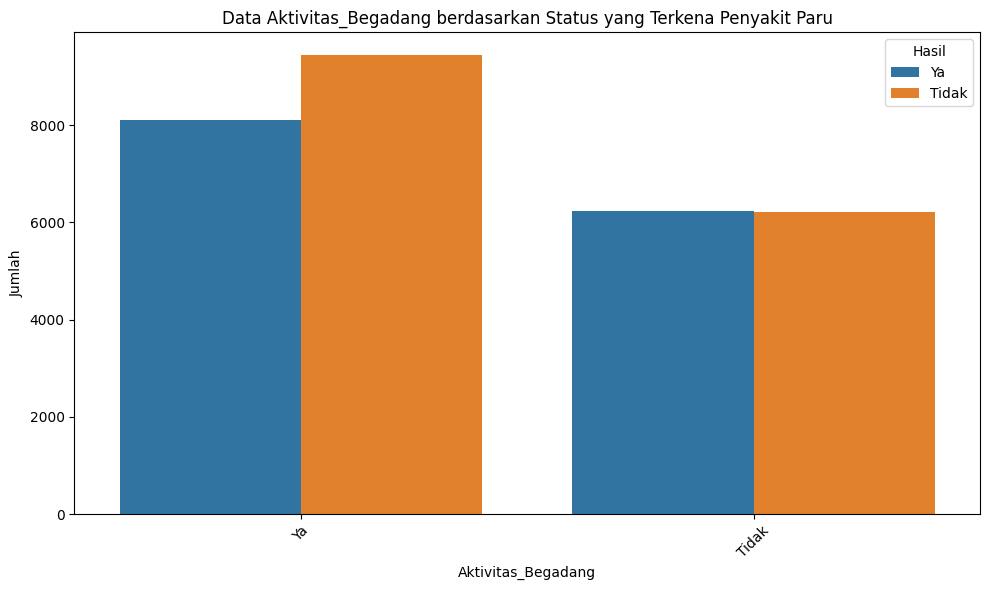

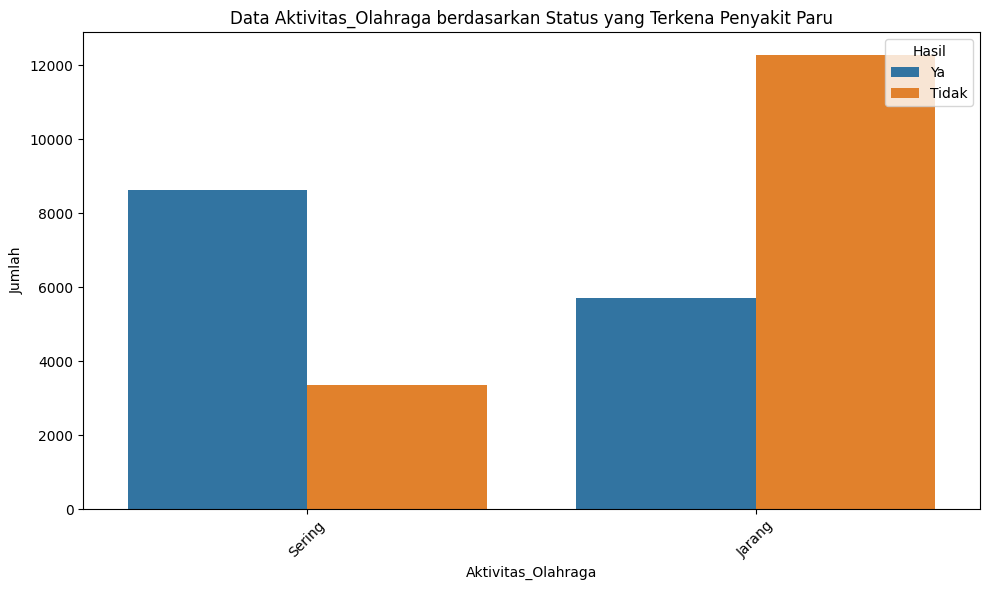

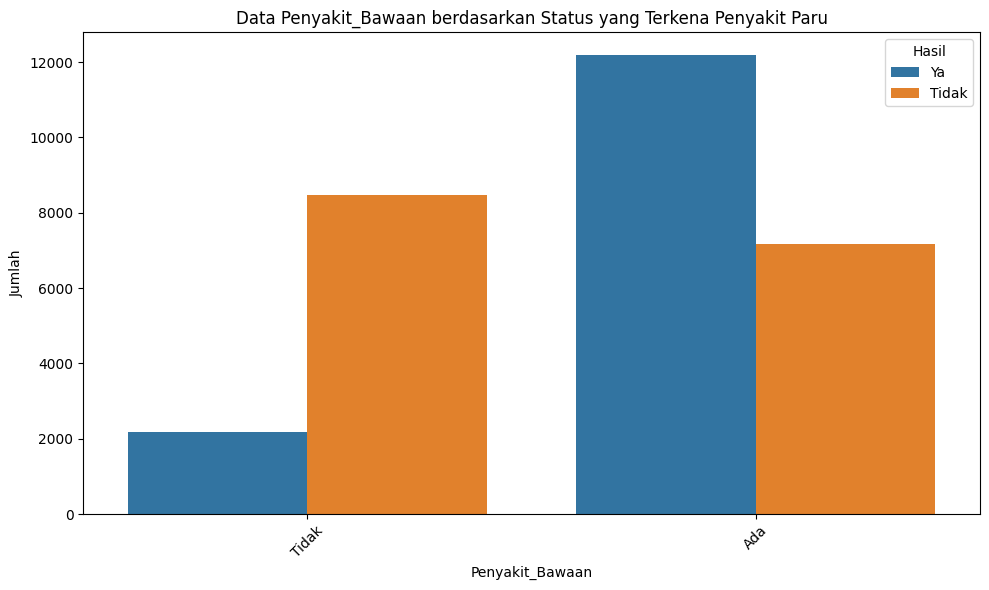

In [14]:
# Mendefinisikan fungsi untuk membuat bar chart yang membandingkan setiap kolom dengan status yang Terkena Penyakit Paru
def plot_stacked_bar_chart(data, column):
    # Membuat figure baru dengan ukuran 10x6 inch
    plt.figure(figsize=(10, 6))
    
    # Membuat bar chart menggunakan seaborn countplot
    # x = kolom yang akan divisualisasikan
    # hue = memberikan warna berbeda berdasarkan status yang Terkena Penyakit Paru
    # data = dataframe yang digunakan
    sns.countplot(x=column, hue='Hasil', data=data)
    
    # Menambahkan judul grafik
    plt.title(f'Data {column} berdasarkan Status yang Terkena Penyakit Paru')
    
    # Menambahkan label pada sumbu x dan y
    plt.xlabel(column)
    plt.ylabel('Jumlah')
    
    # Memutar label sumbu x 45 derajat agar lebih mudah dibaca
    plt.xticks(rotation=45)
    
    # Menambahkan legend dengan judul 'COVID-19' di pojok kanan atas
    plt.legend(title='Hasil', loc='upper right')
    
    # Mengatur layout agar tidak tumpang tindih
    plt.tight_layout()
    
    # Menampilkan plot
    plt.show()

# Melakukan iterasi untuk setiap kolom dalam dataframe
# Dan membuat bar chart untuk membandingkan dengan status COVID-19
# Kecuali untuk kolom 'COVID-19' itu sendiri
for column in df.columns:
    if column != 'Hasil':
        plot_stacked_bar_chart(df, column)

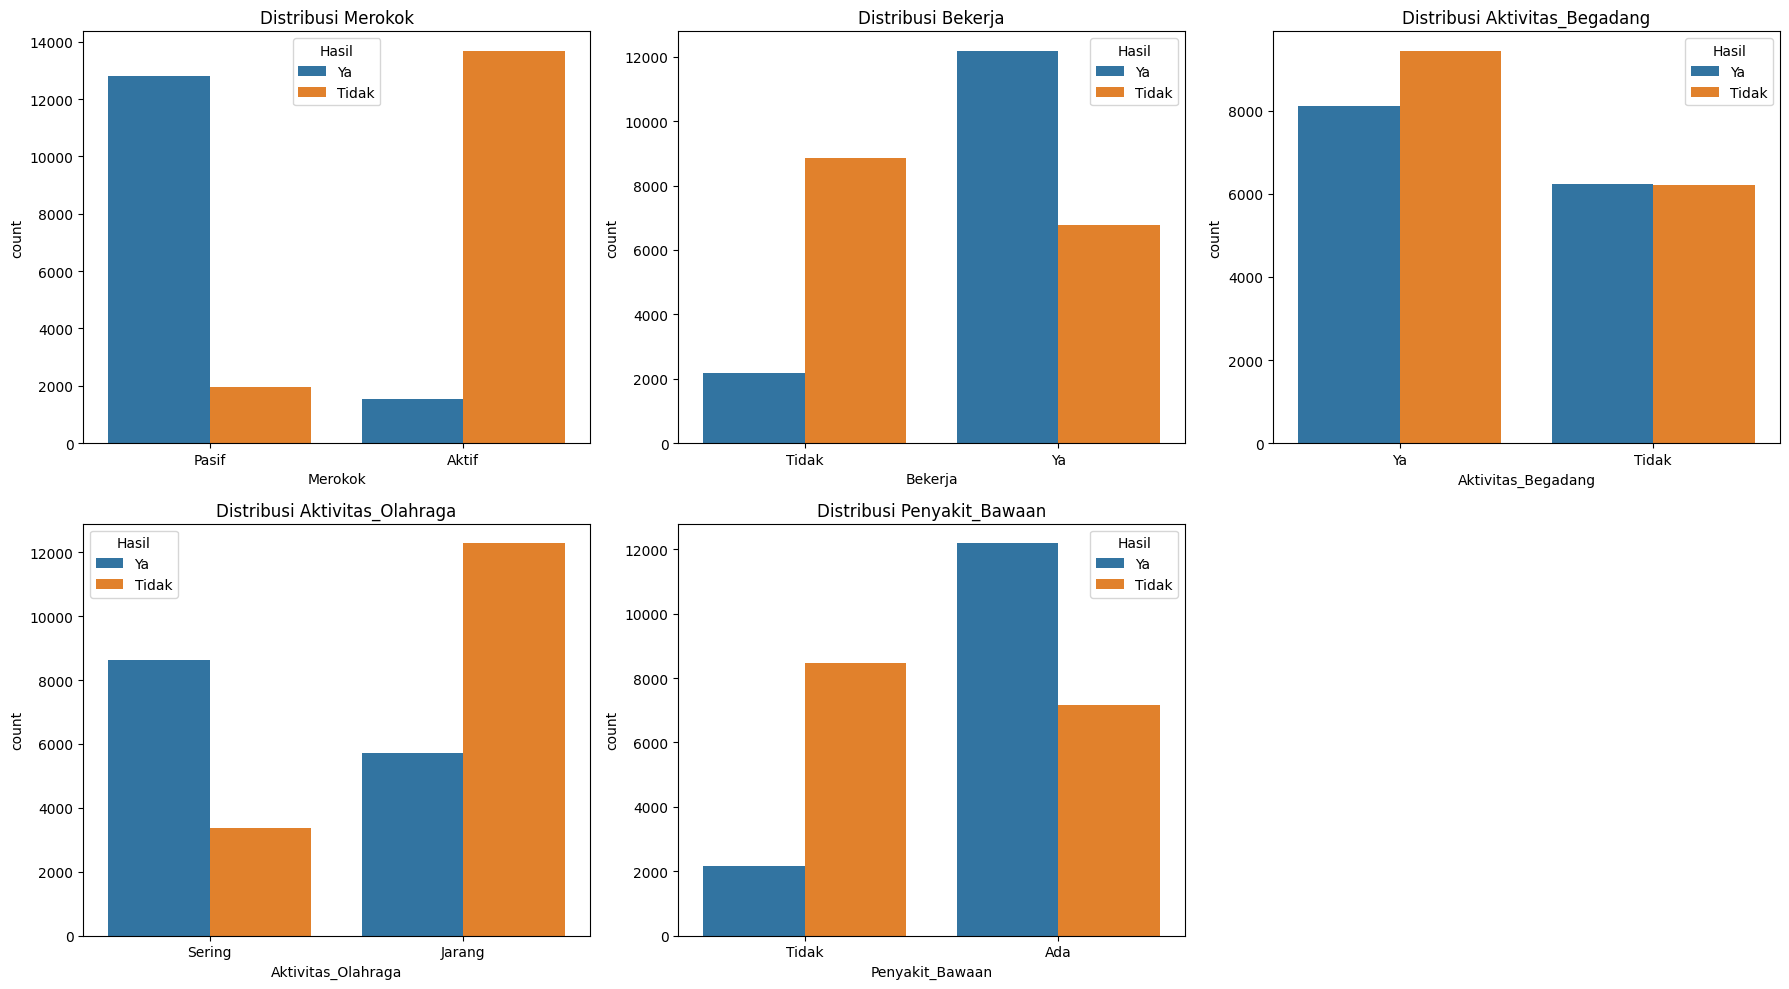

In [15]:
# Mendefinisikan fitur-fitur kunci yang akan divisualisasikan
fitur_kunci = ['Merokok', 'Bekerja', 'Aktivitas_Begadang', 'Aktivitas_Olahraga', 'Penyakit_Bawaan']

# Membuat subplot dengan ukuran 2x3 (total 6 plot, tetapi yang ke-5 akan dibiarkan kosong)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Melakukan iterasi untuk setiap fitur kunci
for i, fitur in enumerate(fitur_kunci):
    # Membuat countplot untuk setiap fitur
    sns.countplot(x=fitur, hue='Hasil', data=df, ax=axes[i//3, i%3])
    
    # Menambahkan judul untuk setiap subplot
    axes[i//3, i%3].set_title(f'Distribusi {fitur}')

# Menghapus subplot yang tidak digunakan
fig.delaxes(axes[1, 2])

# Mengatur layout agar subplot tidak tumpang tindih
plt.tight_layout()

# Menampilkan seluruh plot
plt.show()


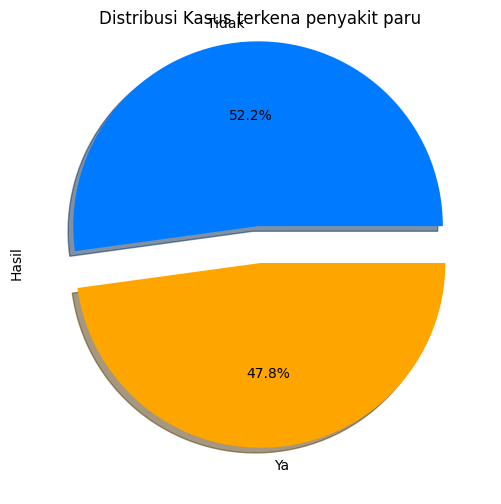

In [16]:
# Membuat pie chart untuk menampilkan distribusi kasus terkena penyakit paru

# Membuat efek 'explode' untuk memisahkan potongan pie sebesar 0.2 untuk slice pertama
# dan 0 untuk slice kedua
explode = (0.2, 0)

# Membuat figure dengan ukuran 8x6 inch
plt.figure(figsize=(8, 6))

# Membuat pie chart:
# - Menghitung jumlah nilai unik dalam kolom Hasil menggunakan value_counts()
# - Mengatur jenis plot menjadi 'pie'
# - autopct='%1.1f%%' untuk menampilkan persentase dengan 1 desimal
# - startangle=0 mengatur sudut awal pie chart
# - colors mengatur warna slice (biru dan oranye)
# - shadow=True memberikan efek bayangan
# - explode mengatur jarak pemisahan slice
df['Hasil'].value_counts().plot(kind='pie', 
                                 autopct='%1.1f%%', 
                                 startangle=0, 
                                 colors=['#007BFF', '#FFA500'], 
                                 shadow=True, 
                                 explode=explode)

# Menambahkan judul grafik
plt.title('Distribusi Kasus terkena penyakit paru')

# Menambahkan label untuk sumbu y
plt.ylabel('Hasil')

# Menampilkan plot
plt.show()

In [17]:
# Melakukan encoding pada variabel kategorikal (mengubah data teks menjadi numerik)
# Membuat objek LabelEncoder untuk melakukan proses encoding
label_encoder = LabelEncoder()

# Melakukan iterasi untuk setiap kolom yang bertipe object (string/teks) dalam dataframe
for column in df.select_dtypes(include=[object]).columns:
    # Mengubah nilai kategorikal menjadi numerik menggunakan fit_transform
    # fit_transform akan:
    # 1. Mempelajari kategori unik dalam kolom (fit)
    # 2. Mengubah setiap kategori menjadi angka (transform)
    # Contoh: 'Tua' -> 1, 'Muda' -> 0
    # Contoh: 'Wanita' -> 1, 'Pria' -> 0
    # Contoh: 'Pasif' -> 1, 'Aktif' -> 0
    # Contoh: 'Ya' -> 1, 'Tidak' -> 0
    # Contoh: 'Sering' -> 1, 'Jarang' -> 0
    df[column] = label_encoder.fit_transform(df[column])


In [18]:
df

,Usia,Jenis_Kelamin,Merokok,Bekerja,Aktivitas_Begadang,Aktivitas_Olahraga,Penyakit_Bawaan,Hasil
0,1,0,1,0,1,1,1,1
1,1,0,0,0,1,0,0,0
2,0,0,0,0,1,0,1,0
3,1,0,0,1,0,0,0,0
4,0,1,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...
29995,0,0,0,0,1,0,1,0
29996,1,1,0,1,1,0,0,0
29997,1,1,0,1,1,0,0,0
29998,0,1,1,1,0,1,0,0


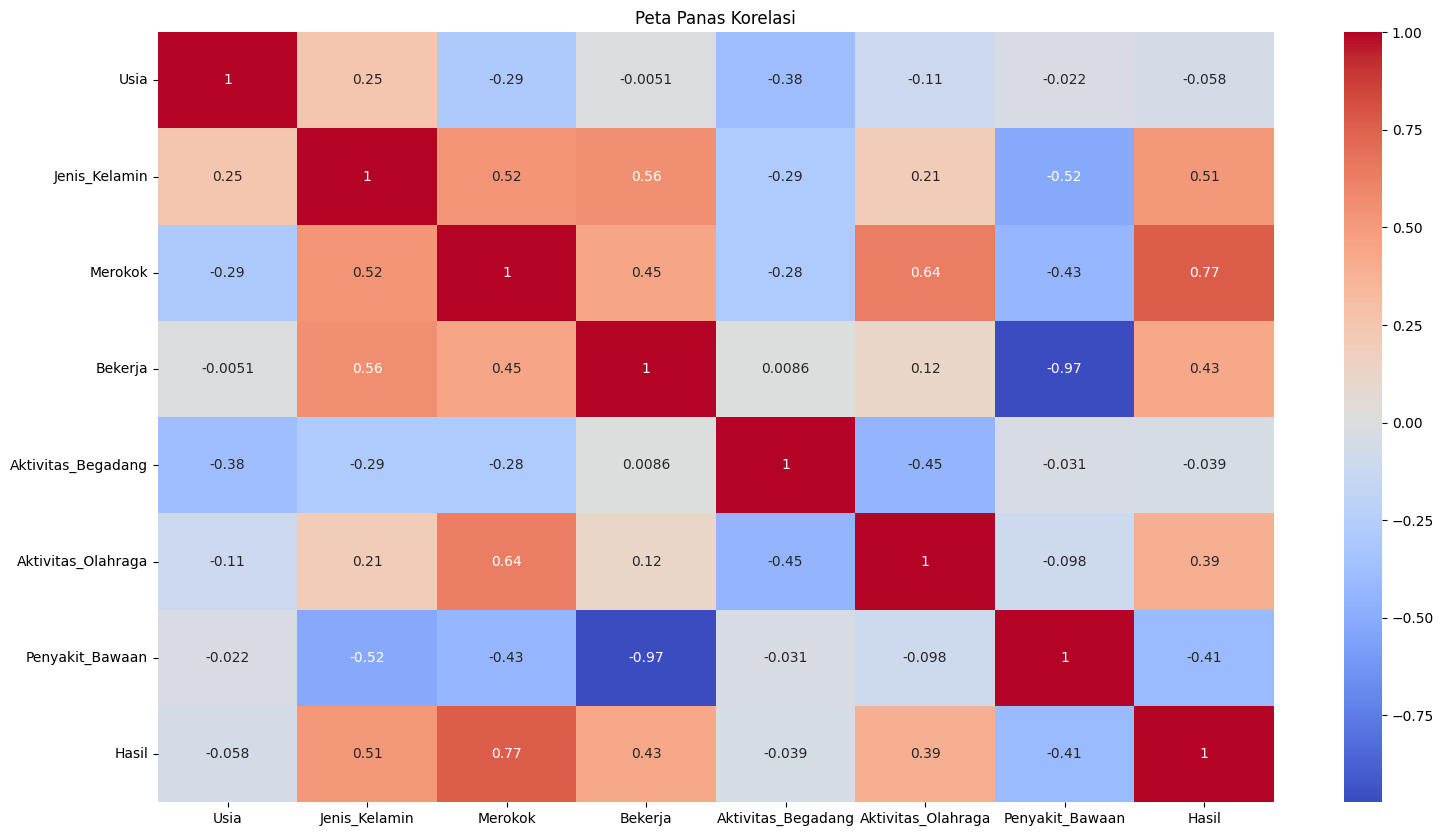

In [19]:
# Membuat visualisasi peta panas (heatmap) untuk melihat korelasi antar variabel numerik

# Memilih kolom-kolom yang bertipe numerik (integer dan float) dari dataframe
kolom_numerik = df.select_dtypes(include=['int64', 'float64']).columns

# Membuat figure dengan ukuran 18x10 inci
plt.figure(figsize=(18, 10))

# Membuat peta panas menggunakan seaborn:
# - df[kolom_numerik].corr() menghitung korelasi antar kolom numerik
# - annot=True menampilkan nilai korelasi di setiap sel
# - cmap='coolwarm' mengatur skema warna (merah=korelasi positif, biru=korelasi negatif)
sns.heatmap(df[kolom_numerik].corr(), annot=True, cmap='coolwarm')

# Menambahkan judul pada plot
plt.title('Peta Panas Korelasi')

# Menampilkan visualisasi
plt.show()

In [39]:
# Langkah 5: Memisahkan data menjadi fitur (X) dan target/label (y)

# Membuat variabel X yang berisi semua kolom kecuali kolom 'Hasil'
# df.drop(columns=['Hasil']) akan menghapus kolom 'Hasil' dari dataframe
# dan menyimpan hasilnya ke variabel X sebagai fitur untuk model
X = df.drop(columns=['Hasil'])

# Membuat variabel y yang hanya berisi kolom 'COVID-19' 
# df['Hasil'] akan mengambil kolom 'COVID-19' saja
# dan menyimpannya ke variabel y sebagai target/label yang akan diprediksi
y = df['Hasil']

In [21]:
# Langkah 6: Data Balancing Menggunakan SMOTE

# Membuat objek SMOTE dengan random_state=42 untuk memastikan hasil yang konsisten
# SMOTE (Synthetic Minority Over-sampling Technique) adalah teknik untuk menangani data yang tidak seimbang
# dengan cara membuat sampel sintetis dari kelas minoritas
smote = SMOTE(random_state=42)

# Melakukan resampling data menggunakan SMOTE:
# - X_balanced: fitur yang sudah diseimbangkan jumlah kelasnya
# - y_balanced: target/label yang sudah diseimbangkan jumlah kelasnya
# fit_resample() akan membuat sampel baru sehingga jumlah data di setiap kelas menjadi sama
X_balanced, y_balanced = smote.fit_resample(X, y)


In [22]:
# Langkah 7: Membagi data menjadi data latih dan data uji
# train_test_split() adalah fungsi untuk membagi dataset menjadi data latih dan data uji
# Parameter yang digunakan:
# - X_balanced: fitur yang sudah diseimbangkan dengan SMOTE
# - y_balanced: target/label yang sudah diseimbangkan dengan SMOTE  
# - test_size=0.2: 20% data akan digunakan sebagai data uji, sisanya 80% untuk data latih
# - random_state=42: untuk memastikan hasil pembagian data yang konsisten setiap kali kode dijalankan
# - stratify=y_balanced: memastikan proporsi kelas pada data latih dan uji tetap seimbang
# Hasil pembagian disimpan ke dalam 4 variabel:
# - X_train: fitur untuk data latih (80% data)
# - X_test: fitur untuk data uji (20% data)
# - y_train: label untuk data latih (80% data)
# - y_test: label untuk data uji (20% data)
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)

In [23]:
# Menampilkan ringkasan dari pembagian data setelah SMOTE
# Mencetak dimensi/ukuran dari data latih fitur (X_train)
# shape akan menampilkan (jumlah baris, jumlah kolom)
print("Dimensi X_train:", X_train.shape)

# Mencetak dimensi/ukuran dari data latih label (y_train)
# shape akan menampilkan (jumlah baris,) karena y_train hanya 1 kolom
print("Dimensi y_train:", y_train.shape)

# Mencetak dimensi/ukuran dari data uji fitur (X_test)
# shape akan menampilkan (jumlah baris, jumlah kolom) 
print("Dimensi X_test:", X_test.shape)

# Mencetak dimensi/ukuran dari data uji label (y_test)
# shape akan menampilkan (jumlah baris,) karena y_test hanya 1 kolom
print("Dimensi y_test:", y_test.shape)

# Mencetak distribusi kelas pada data latih label (y_train)
# value_counts() akan menghitung jumlah data untuk setiap kelas
print("Distribusi kelas pada y_train:")
print(y_train.value_counts())

# Mencetak nama-nama fitur yang digunakan dalam model
# columns akan menampilkan daftar nama kolom dari X_train
print("Fitur yang digunakan:", X_train.columns)

Dimensi X_train: (25036, 7)
Dimensi y_train: (25036,)
Dimensi X_test: (6260, 7)
Dimensi y_test: (6260,)
Distribusi kelas pada y_train:
Hasil
0    12518
1    12518
Name: count, dtype: int64
Fitur yang digunakan: Index(['Usia', 'Jenis_Kelamin', 'Merokok', 'Bekerja', 'Aktivitas_Begadang',
       'Aktivitas_Olahraga', 'Penyakit_Bawaan'],
      dtype='object')


# <p style="background-color:lime; font-family:calibri; color:maroon; font-size:150%; text-align:center; border-radius:15px 50px;">4. Modelling</p>

In [24]:
# Membuat model Decision Tree untuk klasifikasi
# DecisionTreeClassifier adalah algoritma pembelajaran mesin yang membuat keputusan berdasarkan aturan if-else
# Parameter random_state=42 digunakan untuk memastikan hasil yang konsisten setiap kali kode dijalankan
dt_model = DecisionTreeClassifier(random_state=42)

# Melatih model Decision Tree menggunakan data latih (X_train dan y_train)
# fit() akan mempelajari pola dari data latih untuk membuat pohon keputusan
dt_model.fit(X_train, y_train)

# Melakukan prediksi menggunakan model yang sudah dilatih pada data uji (X_test)
# predict() akan menghasilkan prediksi kelas untuk setiap data dalam X_test
# Hasil prediksi disimpan dalam variabel y_pred_dt untuk evaluasi model
y_pred_dt = dt_model.predict(X_test)

In [27]:
# Membuat model Naive Bayes untuk klasifikasi
# GaussianNB() adalah algoritma Naive Bayes yang mengasumsikan fitur-fitur berdistribusi normal/Gaussian
# Naive Bayes bekerja berdasarkan teorema Bayes dengan asumsi bahwa setiap fitur independen satu sama lain
nb_model = GaussianNB()

# Melatih model Naive Bayes menggunakan data latih (X_train dan y_train)
# fit() akan mempelajari probabilitas setiap fitur untuk setiap kelas dari data latih
nb_model.fit(X_train, y_train)

# Melakukan prediksi menggunakan model yang sudah dilatih pada data uji (X_test)
# predict() akan menghasilkan prediksi kelas untuk setiap data dalam X_test berdasarkan probabilitas yang telah dipelajari
# Hasil prediksi disimpan dalam variabel y_pred_nb untuk evaluasi model
y_pred_nb = nb_model.predict(X_test)

# <p style="background-color:lime; font-family:calibri; color:maroon; font-size:150%; text-align:center; border-radius:15px 50px;">5. Evaluation</p>

In [40]:
# Mendefinisikan fungsi untuk membuat visualisasi confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    # Membuat confusion matrix dengan membandingkan nilai aktual (y_true) dan prediksi (y_pred)
    cm = confusion_matrix(y_true, y_pred)
    
    # Membuat figure baru dengan ukuran 8x6 inci
    plt.figure(figsize=(8, 6))
    
    # Membuat heatmap dari confusion matrix menggunakan seaborn
    # annot=True untuk menampilkan nilai di setiap sel
    # fmt='d' untuk format angka sebagai integer
    # cmap='Blues' untuk menggunakan skema warna biru
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    
    # Menambahkan judul plot dengan nama model
    plt.title(f'Confusion Matrix - {model_name}')
    
    # Menambahkan label untuk sumbu y (nilai aktual)
    plt.ylabel('Actual')
    
    # Menambahkan label untuk sumbu x (nilai prediksi) 
    plt.xlabel('Predicted')
    
    # Menampilkan plot
    plt.show()

In [41]:
# Mendefinisikan fungsi untuk membuat plot ROC (Receiver Operating Characteristic) curve
def plot_roc_curve(y_true, y_pred_proba, model_name):
    # Menghitung False Positive Rate (FPR) dan True Positive Rate (TPR)
    # menggunakan fungsi roc_curve dari sklearn
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    
    # Menghitung area di bawah kurva ROC (AUC)
    roc_auc = auc(fpr, tpr)
    
    # Membuat figure baru dengan ukuran 8x6 inci
    plt.figure(figsize=(8, 6))
    
    # Plot kurva ROC dengan warna oranye dan label yang menunjukkan nilai AUC
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    
    # Plot garis baseline (garis diagonal) sebagai pembanding
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    
    # Mengatur batas sumbu x dari 0 sampai 1
    plt.xlim([0.0, 1.0])
    
    # Mengatur batas sumbu y dari 0 sampai 1.05
    plt.ylim([0.0, 1.05])
    
    # Menambahkan label untuk sumbu x
    plt.xlabel('False Positive Rate')
    
    # Menambahkan label untuk sumbu y
    plt.ylabel('True Positive Rate')
    
    # Menambahkan judul plot dengan nama model
    plt.title(f'Receiver Operating Characteristic - {model_name}')
    
    # Menambahkan legend di pojok kanan bawah
    plt.legend(loc="lower right")
    
    # Menampilkan plot
    plt.show()


In [42]:
# Membuat dictionary yang berisi model-model machine learning yang akan dievaluasi
# Dictionary ini memiliki:
# - Key: nama model (string) 
# - Value: objek model yang sudah dilatih sebelumnya

# models adalah dictionary yang berisi:
# - Decision Tree (dt_model): Model pohon keputusan untuk klasifikasi
# - Random Forest (rf_model): Model random forest yang menggunakan banyak pohon keputusan
# - Naive Bayes (nb_model): Model naive bayes untuk klasifikasi probabilistik
# - SVM (svm_model): Model Support Vector Machine untuk klasifikasi
# - KNN (knn_model): Model K-Nearest Neighbors untuk klasifikasi berdasarkan tetangga terdekat
models = {
    'Decision Tree': dt_model, 
    'Naive Bayes': nb_model
}


Model: Decision Tree
Accuracy: 0.887220447284345
Classification Report:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90      3130
           1       1.00      0.77      0.87      3130

    accuracy                           0.89      6260
   macro avg       0.91      0.89      0.89      6260
weighted avg       0.91      0.89      0.89      6260

Confusion Matrix:
 [[3130    0]
 [ 706 2424]]


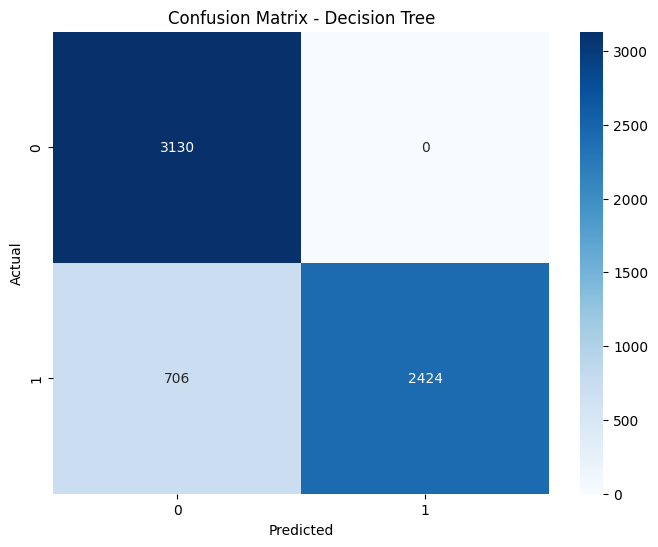

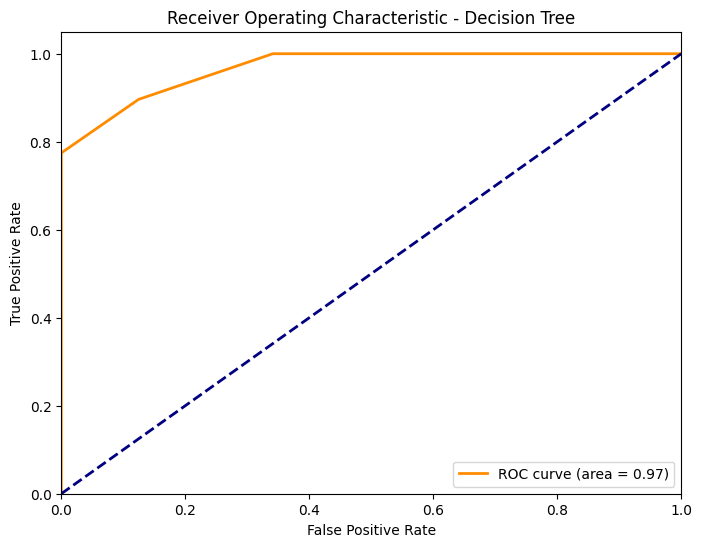


Model: Naive Bayes
Accuracy: 0.8738019169329073
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.87      3130
           1       0.88      0.87      0.87      3130

    accuracy                           0.87      6260
   macro avg       0.87      0.87      0.87      6260
weighted avg       0.87      0.87      0.87      6260

Confusion Matrix:
 [[2740  390]
 [ 400 2730]]


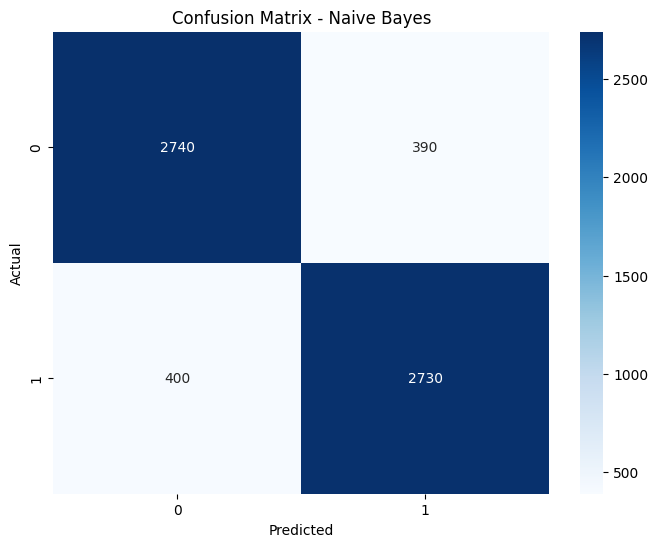

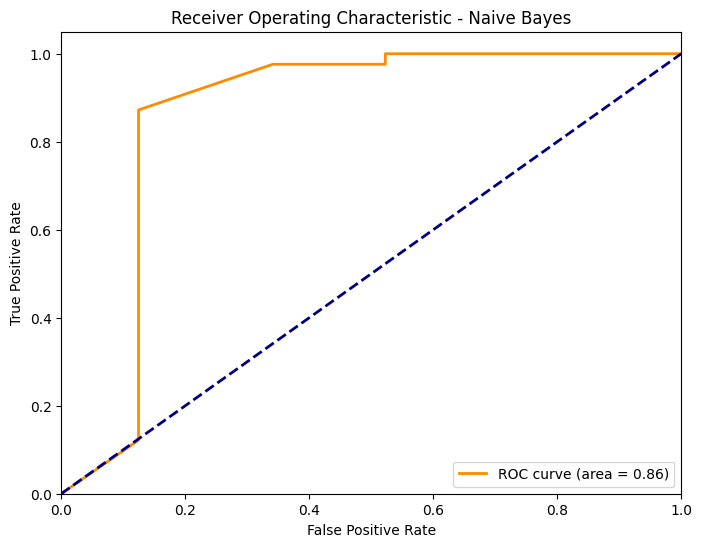

In [43]:
# Melakukan iterasi untuk setiap model dalam dictionary models
for model_name, model in models.items():
    # Melakukan prediksi menggunakan data test
    y_pred = model.predict(X_test)
    
    # Mencetak nama model yang sedang dievaluasi
    print(f"\nModel: {model_name}")
    
    # Menghitung dan mencetak accuracy score dengan membandingkan hasil prediksi dengan nilai sebenarnya
    print("Accuracy:", accuracy_score(y_test, y_pred))
    
    # Mencetak classification report yang berisi precision, recall, f1-score untuk setiap kelas
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Mencetak confusion matrix yang menunjukkan jumlah true positive, false positive, true negative, false negative
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    
    # Membuat visualisasi confusion matrix dalam bentuk heatmap
    plot_confusion_matrix(y_test, y_pred, model_name)
    
    # Mengecek apakah model mendukung prediksi probabilitas
    if hasattr(model, "predict_proba"):
        # Jika model mendukung predict_proba, gunakan itu untuk mendapatkan probabilitas kelas positif
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        # Plot kurva ROC menggunakan probabilitas prediksi
        plot_roc_curve(y_test, y_pred_proba, model_name)
    elif model_name == 'SVM':  
        # Khusus untuk model SVM, gunakan decision_function untuk mendapatkan skor prediksi
        y_pred_proba = model.decision_function(X_test)
        # Plot kurva ROC menggunakan skor decision function
        plot_roc_curve(y_test, y_pred_proba, model_name)

In [45]:
# Evaluasi model Decision Tree
# Menghitung akurasi dengan membandingkan nilai prediksi dengan nilai sebenarnya
accuracy_dt = accuracy_score(y_test, y_pred_dt)
# Membuat laporan klasifikasi yang berisi precision, recall, f1-score untuk setiap kelas
classification_report_dt = classification_report(y_test, y_pred_dt)
# Membuat confusion matrix untuk melihat true positive, false positive, true negative, false negative
confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Menampilkan hasil evaluasi Decision Tree
print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree Classification Report:\n", classification_report_dt)
print("Decision Tree Confusion Matrix:\n", confusion_matrix_dt)

# Evaluasi model Naive Bayes
# Menghitung akurasi Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
# Membuat laporan klasifikasi Naive Bayes
classification_report_nb = classification_report(y_test, y_pred_nb)
# Membuat confusion matrix Naive Bayes
confusion_matrix_nb = confusion_matrix(y_test, y_pred_nb)

# Menampilkan hasil evaluasi Naive Bayes
print("Naive Bayes Accuracy:", accuracy_nb)
print("Naive Bayes Classification Report:\n", classification_report_nb)
print("Naive Bayes Confusion Matrix:\n", confusion_matrix_nb)

Decision Tree Accuracy: 0.887220447284345
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90      3130
           1       1.00      0.77      0.87      3130

    accuracy                           0.89      6260
   macro avg       0.91      0.89      0.89      6260
weighted avg       0.91      0.89      0.89      6260

Decision Tree Confusion Matrix:
 [[3130    0]
 [ 706 2424]]
Naive Bayes Accuracy: 0.8738019169329073
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.87      3130
           1       0.88      0.87      0.87      3130

    accuracy                           0.87      6260
   macro avg       0.87      0.87      0.87      6260
weighted avg       0.87      0.87      0.87      6260

Naive Bayes Confusion Matrix:
 [[2740  390]
 [ 400 2730]]


In [46]:
# Membuat dictionary untuk menyimpan hasil evaluasi dari semua model
# Dictionary ini akan memudahkan dalam membandingkan performa antar model
model_performance = {
    # Menyimpan hasil evaluasi model Decision Tree
    'Decision Tree': {
        'Accuracy': accuracy_dt,                       # Nilai akurasi
        'Classification Report': classification_report_dt,  # Laporan klasifikasi detail
        'Confusion Matrix': confusion_matrix_dt        # Matrix konfusi
    },
    # Menyimpan hasil evaluasi model Naive Bayes
    'Naive Bayes': {
        'Accuracy': accuracy_nb,
        'Classification Report': classification_report_nb,
        'Confusion Matrix': confusion_matrix_nb
    }
}

# Menampilkan hasil evaluasi untuk setiap model
# Loop melalui setiap model dalam dictionary
for model_name, performance in model_performance.items():
    print(f"\nModel: {model_name}")                                    # Nama model
    print(f"Accuracy: {performance['Accuracy']}")                      # Nilai akurasi model
    print("Classification Report:\n", performance['Classification Report'])  # Laporan klasifikasi detail
    print("Confusion Matrix:\n", performance['Confusion Matrix'])           # Matrix konfusi


Model: Decision Tree
Accuracy: 0.887220447284345
Classification Report:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90      3130
           1       1.00      0.77      0.87      3130

    accuracy                           0.89      6260
   macro avg       0.91      0.89      0.89      6260
weighted avg       0.91      0.89      0.89      6260

Confusion Matrix:
 [[3130    0]
 [ 706 2424]]

Model: Naive Bayes
Accuracy: 0.8738019169329073
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.87      3130
           1       0.88      0.87      0.87      3130

    accuracy                           0.87      6260
   macro avg       0.87      0.87      0.87      6260
weighted avg       0.87      0.87      0.87      6260

Confusion Matrix:
 [[2740  390]
 [ 400 2730]]


# <p style="background-color:lime; font-family:calibri; color:maroon; font-size:150%; text-align:center; border-radius:15px 50px;">6. Deployment</p>

In [47]:
# Import library joblib untuk menyimpan dan memuat model machine learning
import joblib

# Menyimpan model-model yang telah dilatih ke dalam file .pkl
# joblib.dump() digunakan untuk menyimpan model ke dalam file
# Parameter pertama adalah model yang akan disimpan
# Parameter kedua adalah nama file untuk menyimpan model

# Menyimpan model Decision Tree ke file decision_tree_model.pkl
joblib.dump(dt_model, 'decision_tree_model.pkl')

# Menyimpan model Naive Bayes ke file naive_bayes_model.pkl
joblib.dump(nb_model, 'naive_bayes_model.pkl')

['naive_bayes_model.pkl']

In [48]:
# Memuat kembali model-model yang telah disimpan sebelumnya menggunakan joblib.load()

# Memuat model Decision Tree dari file decision_tree_model.pkl
# Model ini akan digunakan untuk melakukan prediksi klasifikasi COVID-19
loaded_dt_model = joblib.load('decision_tree_model.pkl')

# Memuat model Naive Bayes dari file naive_bayes_model.pkl
# Model probabilistik yang menggunakan teorema Bayes untuk klasifikasi
loaded_nb_model = joblib.load('naive_bayes_model.pkl')

In [49]:
# Membuat data baru untuk pengujian prediksi
# Mengambil baris pertama dari data test (X_test) sebagai contoh data
# to_frame().T digunakan untuk mengubah series menjadi dataframe dan melakukan transpose
new_data = X_test.iloc[0].to_frame().T

# Melakukan prediksi menggunakan model-model yang telah dimuat sebelumnya
# Setiap model akan memberikan prediksi berdasarkan data baru yang diberikan
prediction_dt = loaded_dt_model.predict(new_data)    # Prediksi menggunakan Decision Tree
prediction_nb = loaded_nb_model.predict(new_data)    # Prediksi menggunakan Naive Bayes

# Menampilkan hasil prediksi dari setiap model
# Jika hasil prediksi = 1 maka "Positif", jika tidak maka "Negatif"
# Menggunakan f-string dan ternary operator untuk format output
print(f"Decision Tree Prediction: {'Positif' if prediction_dt[0] == 1 else 'Negatif'}")   # Hasil prediksi Decision Tree
print(f"Naive Bayes Prediction: {'Positif' if prediction_nb[0] == 1 else 'Negatif'}")     # Hasil prediksi Naive Bayes

Decision Tree Prediction: Positif
Naive Bayes Prediction: Positif
